In [1]:
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.10.0


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized')

Pixels are normalized


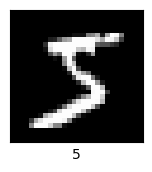

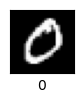

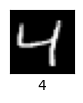

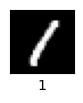

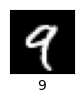

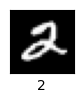

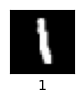

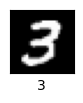

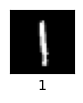

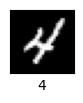

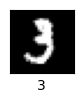

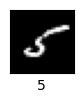

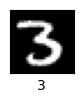

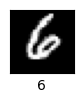

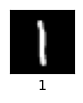

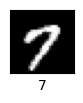

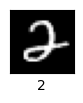

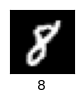

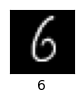

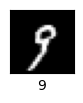

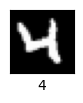

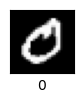

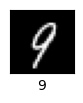

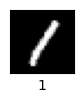

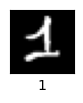

In [4]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(train_images[i], cmap=plt.cm.gray)
   plt.xlabel(train_labels[i])
   plt.show()



In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [14]:
model = keras.Sequential([
keras.layers.InputLayer(input_shape=(28, 28)),
keras.layers.Reshape(target_shape=(28, 28, 1)),
keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Define how to train the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Train the digit classification model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)
history= model.fit(train_images, train_labels, epochs=8, batch_size=64,validation_data=(test_images, test_labels), callbacks=[early_stop])

Epoch 1/8
938/938 [==============================] - 17s 17ms/step - loss: 0.3429 - accuracy: 0.9064 - val_loss: 0.1586 - val_accuracy: 0.9554
Epoch 2/8
938/938 [==============================] - 12s 13ms/step - loss: 0.1297 - accuracy: 0.9634 - val_loss: 0.0969 - val_accuracy: 0.9709
Epoch 3/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0910 - accuracy: 0.9743 - val_loss: 0.0761 - val_accuracy: 0.9769
Epoch 4/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0736 - accuracy: 0.9786 - val_loss: 0.0711 - val_accuracy: 0.9771
Epoch 5/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0638 - accuracy: 0.9815 - val_loss: 0.0691 - val_accuracy: 0.9781
Epoch 6/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0566 - accuracy: 0.9836 - val_loss: 0.0590 - val_accuracy: 0.9791
Epoch 7/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0602 - val_accuracy: 0.9802

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 12)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2028)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                20290     
                                                                 
Total params: 20,410
Trainable params: 20,410
Non-trainable params: 0
__________________________________________________

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy:',test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0565 - accuracy: 0.9810
test accuracy: 0.9810000061988831


In [17]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

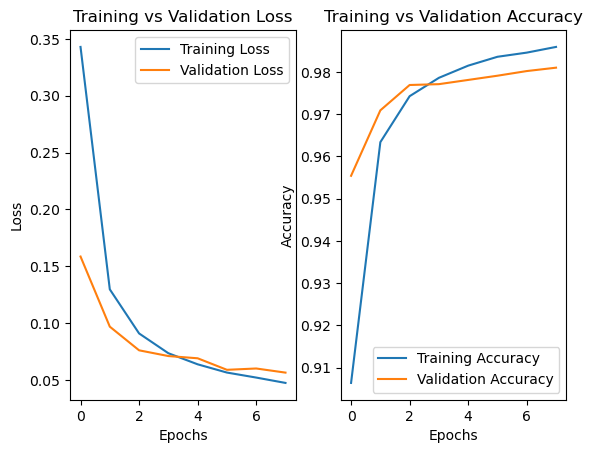

In [19]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

313/313 [==============================] - 2s 5ms/step


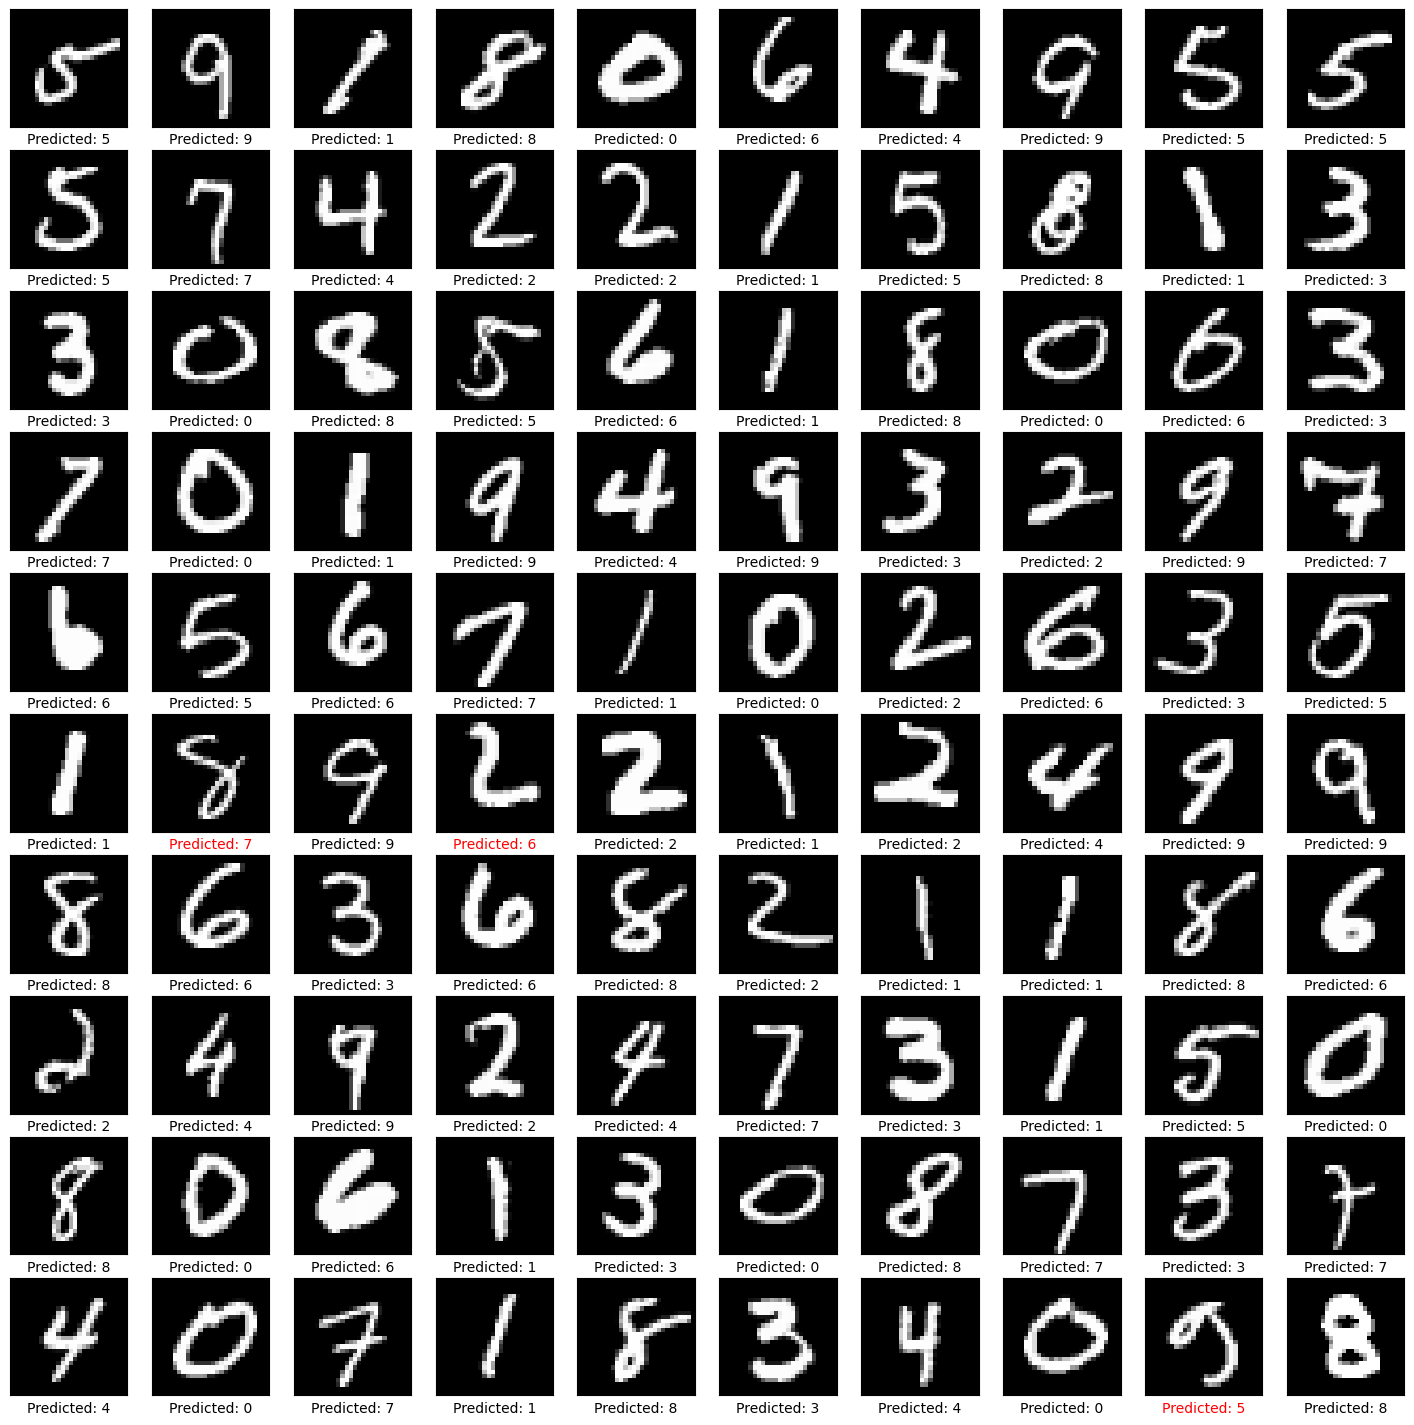

In [28]:
def get_label_color(val1,val2):
    if val1==val2:
       return 'black'
    else:
        return 'red'
predictions = model.predict(test_images)
prediction_digits = np.argmax(predictions, axis=1)
plt.figure(figsize=(18,18))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(prediction_digits))
    plt.imshow(test_images[image_index], cmap=plt.cm.gray)
    ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index], test_labels[image_index]))
    plt.xlabel('Predicted: %d' % prediction_digits[image_index])

plt.show()